In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Loading the dataset
ecom = pd.read_csv("Ecommerce_product.csv", index_col=0)

In [3]:
# Set up default styles for the plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. DATA PROFILING AND SUMMARY STATISTICS

In [29]:
# Displaying summary statistics
print("Summary Statistics:")
ecom.describe(include='all')

Summary Statistics:


,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,Month
count,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,100,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN
top,Biography,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN
freq,22,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN
mean,NaN,NaN,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000,2023-12-10 16:06:14.400000,NaN,6.686000
min,NaN,NaN,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000,2023-06-14 00:00:00,NaN,1.000000
25%,NaN,NaN,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000,2023-09-09 00:00:00,NaN,4.000000
50%,NaN,NaN,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000,2023-12-05 12:00:00,NaN,7.000000
75%,NaN,NaN,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000,2024-03-09 00:00:00,NaN,10.000000
max,NaN,NaN,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000,2024-06-11 00:00:00,NaN,12.000000


In [30]:
# checking for null values and data types

ecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ProductName    1000 non-null   object        
 1   Category       1000 non-null   object        
 2   Price          1000 non-null   float64       
 3   Rating         1000 non-null   float64       
 4   NumReviews     1000 non-null   int64         
 5   StockQuantity  1000 non-null   int64         
 6   Discount       1000 non-null   float64       
 7   Sales          1000 non-null   int64         
 8   DateAdded      1000 non-null   datetime64[ns]
 9   City           1000 non-null   object        
 10  Month          1000 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(3), object(3)
memory usage: 89.8+ KB


In [9]:
# varifing/Checking for any missing values

print("\nMissing Values:")
ecom.isnull().sum()


Missing Values:


ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

In [10]:
# Checking the unique values for categorical columns
print("\nUnique values in categorical columns:")
print("-----------------------------------------")
for col in ecom.select_dtypes(include=['object']).columns:
    print(f"{col}: {ecom[col].nunique()} unique values")


Unique values in categorical columns:
-----------------------------------------
ProductName: 100 unique values
Category: 25 unique values
DateAdded: 346 unique values
City: 101 unique values


In [11]:
# Selecting only numeric columns for correlation
numeric_data = ecom.select_dtypes(include=[float, int])

# Displaying correlation matrix
corr_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
corr_matrix



Correlation Matrix:


,Price,Rating,NumReviews,StockQuantity,Discount,Sales
Price,1.000000,-0.006462,0.012782,-0.006409,-0.045133,0.029076
Rating,-0.006462,1.000000,-0.009832,0.000576,0.024495,0.008475
NumReviews,0.012782,-0.009832,1.000000,-0.020958,-0.015579,0.056586
StockQuantity,-0.006409,0.000576,-0.020958,1.000000,-0.007659,-0.001458
Discount,-0.045133,0.024495,-0.015579,-0.007659,1.000000,0.027413
Sales,0.029076,0.008475,0.056586,-0.001458,0.027413,1.000000


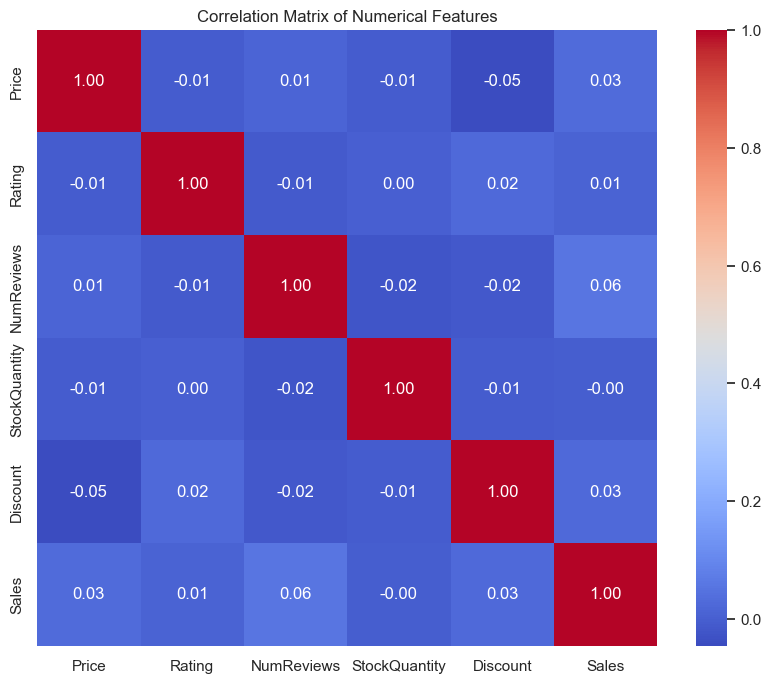

In [12]:
# Visualizing the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 2. DATA VISUALIZATION AND EXPLORATION

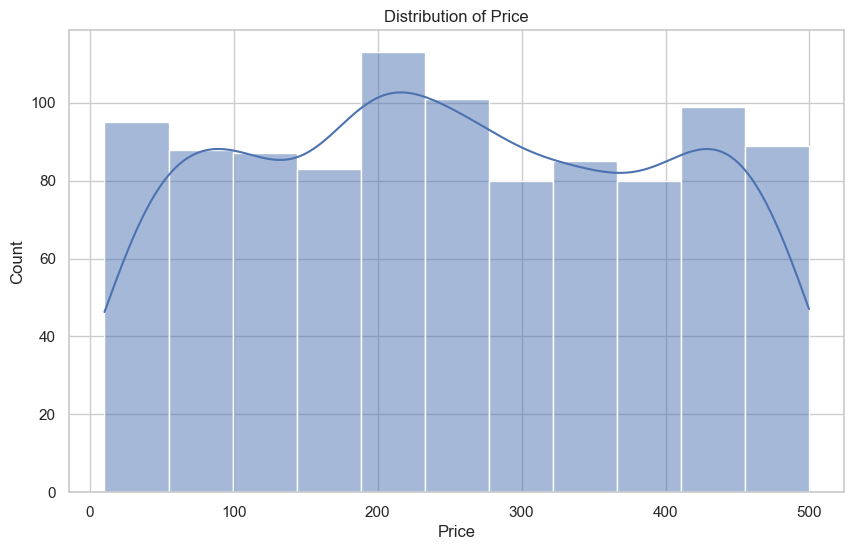

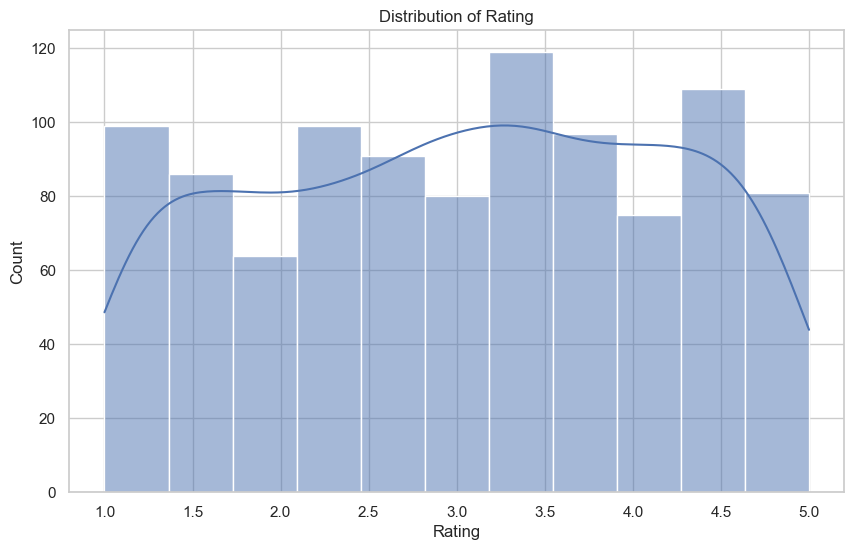

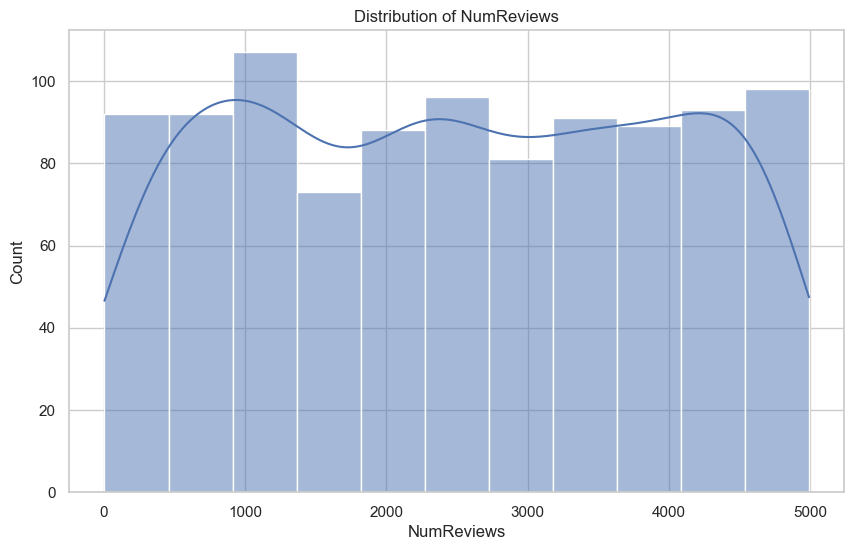

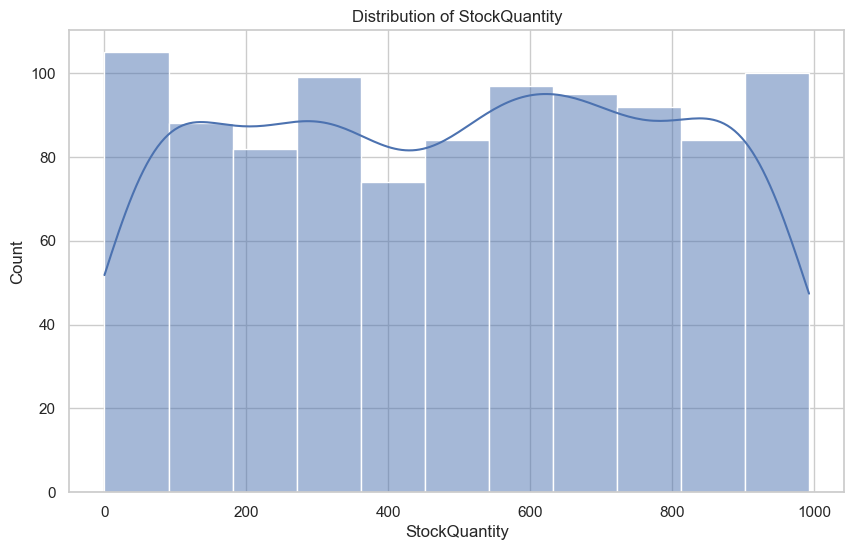

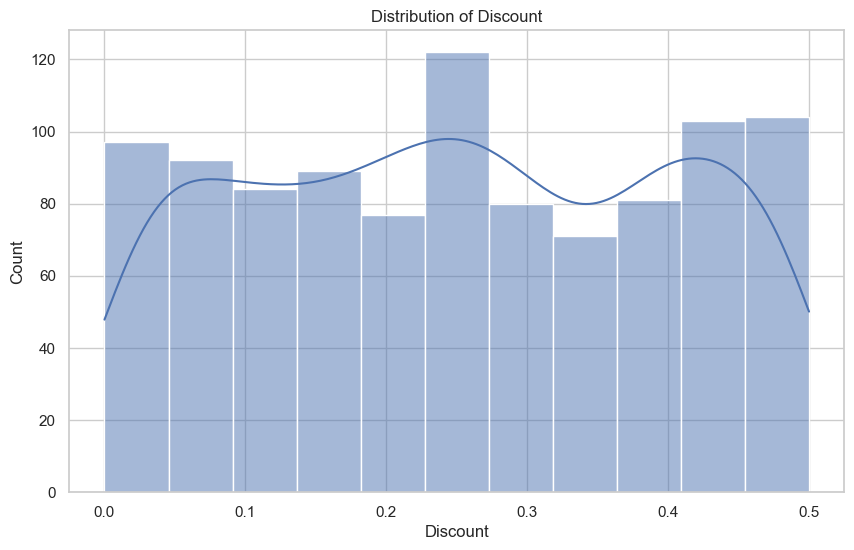

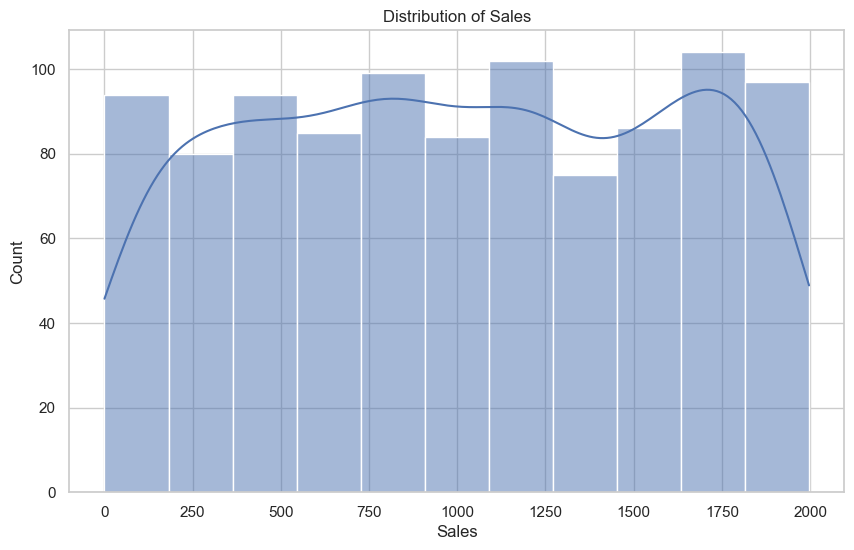

In [13]:
# Distribution plots for continuous variables
continuous_vars = ['Price', 'Rating', 'NumReviews', 'StockQuantity', 'Discount', 'Sales']
for var in continuous_vars:
    sns.histplot(ecom[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()

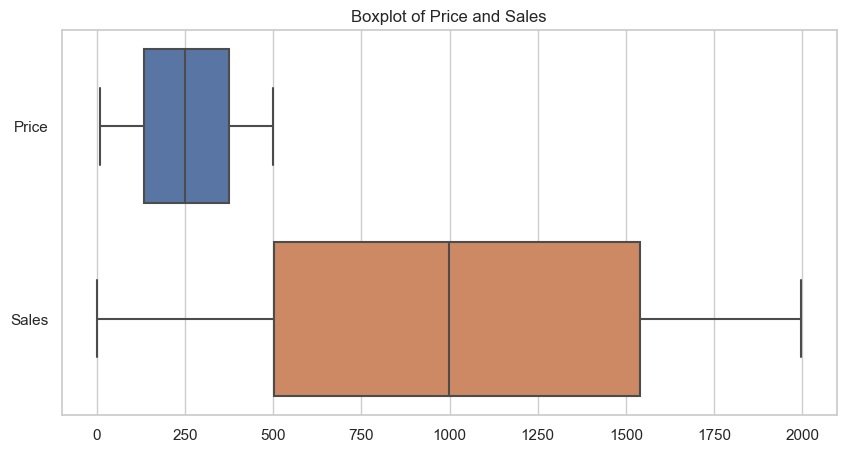

In [14]:
# Boxplot to identify outliers in Price and Sales
plt.figure(figsize=(10, 5))
sns.boxplot(data=ecom[['Price', 'Sales']], orient="h")
plt.title("Boxplot of Price and Sales")
plt.show()

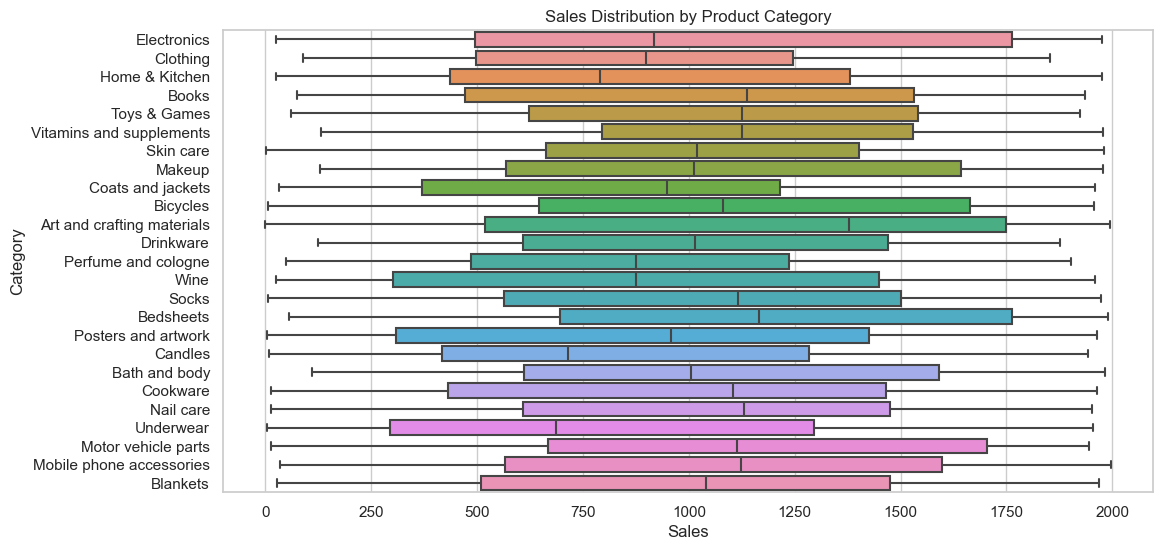

In [15]:
# Sales distribution per category
plt.figure(figsize=(12, 6))
sns.boxplot(data=ecom, x="Sales", y="Category", orient="h")
plt.title("Sales Distribution by Product Category")
plt.show()

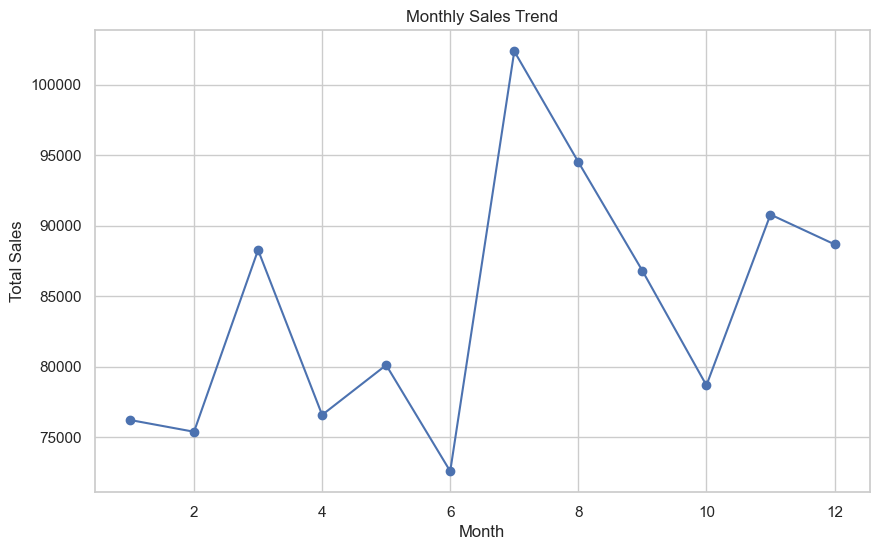

In [16]:
# Sales trend over time
ecom['DateAdded'] = pd.to_datetime(ecom['DateAdded'])
ecom['Month'] = ecom['DateAdded'].dt.month
sales_trend = ecom.groupby("Month")["Sales"].sum()

plt.plot(sales_trend.index, sales_trend.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

## 3. INFERENTIAL STATISTICS - HYPOTHESIS TESTING

In [31]:
# Define significance level
alpha = 0.05 

# Spliting data based on discount
discounted_sales = ecom[ecom["Discount"] > 0]["Sales"]
non_discounted_sales = ecom[ecom["Discount"] == 0]["Sales"]

# Conducting t-test
t_stat, p_value = stats.ttest_ind(discounted_sales, non_discounted_sales)


if p_value < alpha:
    result = "Reject the null hypothesis: There is a statistically significant difference in sales based on discount offers."
else:
    result = "Fail to reject the null hypothesis: There is no statistically significant difference in sales based on discount offers."


print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
result

T-statistic: 1.0160, P-value: 0.3099


'Fail to reject the null hypothesis: There is no statistically significant difference in sales based on discount offers.'

## Conclusion:

In the exploratory data analysis (EDA) phase, we examined key features to identify patterns and relationships that could influence sales outcomes. While correlation analysis showed that Price and NumReviews have the highest correlations with Sales, these relationships are relatively weak, indicating that sales may not be strongly influenced by any single factor among the features examined.

The summary statistics further highlighted substantial variability in features like Price, StockQuantity, and Sales, suggesting that these variables exhibit significant spread and could contribute valuable insights in predictive modeling. In testing the impact of Discount on Sales, our hypothesis test yielded a p-value of 0.3099, indicating that we do not have statistically significant evidence to suggest discounts drive higher sales in this dataset.

These insights suggest that building a robust predictive model will likely require us to explore feature engineering approaches and interaction effects to capture any nuanced relationships with Sales. The results of our EDA provide a strong foundation for selecting and engineering the most relevant features for developing an effective predictive model in the next phase.